In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [56]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 162us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7205 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.4450 - acc: 0.6879 - val_loss: 1.3454 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.0953 - acc: 0.7653 - val_loss: 1.1711 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8697 - acc: 0.8160 - val_loss: 1.0777 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.7030 - acc: 0.8479 - val_loss: 0.9839 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.5652 - acc: 0.8805 - val_loss: 0.9405 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.4571 - acc: 0.9057 - val_loss: 0.9079 - val_acc: 0.8020


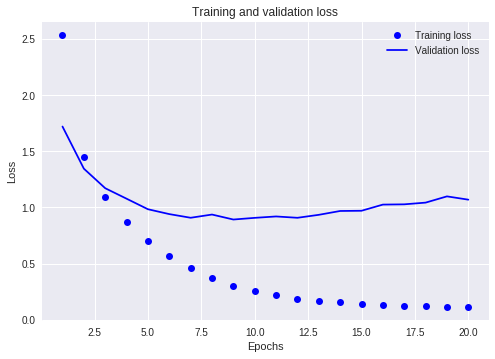

In [57]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

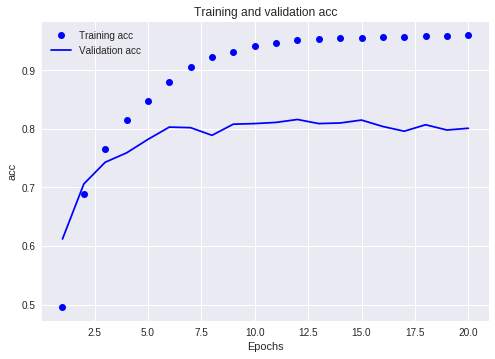

In [60]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val)
         )
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 188us/step - loss: 2.6127 - acc: 0.4643 - val_loss: 1.7307 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 154us/step - loss: 1.4081 - acc: 0.7081 - val_loss: 1.2753 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.0432 - acc: 0.7788 - val_loss: 1.1035 - val_acc: 0.7620
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.8186 - acc: 0.8320 - val_loss: 1.0278 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.6512 - acc: 0.8622 - val_loss: 0.9520 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.5298 - acc: 0.8904 - val_loss: 0.9203 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.4206 - acc: 0.9109 - val_loss: 0.9026 - val_acc: 0.8130
Epoch 8

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.19056099732858414

In [66]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [67]:
np.sum(predictions[0])

0.99999976

In [68]:
np.argmax(predictions[0])

3